<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/Case_2_varejo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONTEXTULIZAÇÃO :**

Uma loja de varejo que deseja criar alguns KPIS para acompanhar as vendas.
primeiro faça a limpeza dos dados e ajuste antes de criar as metricas.



OUTPUTS :

 1 Departamentos mais vendidos

 2 Media de preço com frete por departamento

 3 Quantidade de vendas por Mês

 4 Media de renda para cada tipo de canal

 5 media de idade de cliente por bandeira



# PREMISSAS :

- Erro no sistema para compras sem UF , considerar estado do MS

- Preço não pode ser maior que preço com frete


#TRATAMENTO DOS DADOS


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
vendas=pd.read_excel("/content/varejo.xlsx")

In [ ]:
#Analisando as 10 primeiras linhas
vendas.head(10)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742
6,464255,Internet,A,2023-01-02,599.200,599.200,Eletrodomesticos,SP,5604
7,39780,Internet,B,2023-04-29,352.080,352.080,Acessorios e Inovacoes,BA,9098
8,75525,Mobile,B,2023-02-19,679.200,695.120,Moveis,SP,3442
9,82755,APP,B,2023-02-09,179.928,179.928,Beleza e Saude,SP,7026


In [ ]:
#informações sobre o tipo de dados e verificando as colunas com dados nulos ou vazios
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
# Com nunique consigo extraior a contagem de uma coluna dentro do data set
#codigo:
#dataset.groupby("nome da coluna").nome_da_coluna_contada.nunique()
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
#com esta pequena linha de codigo fiz um agrupamento de app para Aplicativo
vendas["idcanalvenda"] = vendas ["idcanalvenda"].str.replace("APP","Aplicativo")
#visualização
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
#Com esta linha de codigo , fiz duas alterações uma para retirar espaços vazio e a outra para retirar virgulas dos nomes da coluna.
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ","_")
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(",","_")

#nesta linha de codigo fiz um agrupamento para verificar a mudança na coluna.
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama__Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

# RETIRADA DE DADOS NULOS


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
#Para visualizar dados nulos de uma coluna
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [ ]:
#Crio uma base de dados novas que vai agrupar o data set sem os dados nulos

vendas_sem_nulos =  vendas.dropna()

#Depois faça a verificação para ver se os dados nulos foram apagados, verifique se todas as linhas de não nulos esta com valor igual.
vendas_sem_nulos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


TROCA DE BASES NULAS POR VALORES ESTABELECIDO E MEDIA

In [ ]:
# com esta linha de codigo posso fazer a  troca de dados nulo na coluna de estado para MS .
vendas["estado"]=vendas["estado"].fillna("MS")

#Verificando se estado ainda contem dados nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
#Linha para tirar media da coluna de preço , ela sera o que vai preencher os valores vazios
media_preco =  vendas["Preço"].mean()

#Anexando a variavel de media nos preço vazios
vendas["Preço"]= vendas["Preço"].fillna(media_preco)

#verificando se existem dados vazios a ser preenchido
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
#Valor de media
media_preco


906.5891285439033

In [ ]:
vendas

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790
...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones_e_Celulares,RJ,15746
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones_e_Celulares,AM,443
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones_e_Celulares,PB,9349
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones_e_Celulares,PB,10944


# Filtragem de dados


In [ ]:
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [ ]:
# A função query e uma das para filtragem de dados que facilita e utiliza menos memoria do notebook

#Para analisar os dois cenarios possiveis de analisar preços  maior que preço com frete quebramos a base em dois .
Preço_errado = vendas.query("Preço > Preço_com_frete")

#Este é o dataset correto para se usar na analise, ja que retira e atende uma das premissas que preço não pode ser maior que preço com frente
vendas_correto = vendas.query("Preço < Preço_com_frete")

In [ ]:
# Dataset apos a limpeza os preços errados e correção do erro de estado .
# Note que a quantidade de linhas caiu dratiscamente de  80228 para 22047

vendas_correto

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060
...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206


# **Respondendo os Problemas de Negócios**



In [ ]:
# 1 Departamentos mais vendidos , o nunique é a função cont.se do python  ele faz a contagem de dos valores pedidos,
#sort_values serve para ajustar por ordem , reset_indedx serve para ajustar os dados de formas tabulares

vendas.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()




,Nome_Departamento,idcompra
0,Telefones_e_Celulares,14495
1,Eletrodomesticos,10501
2,Eletroportateis,9593
3,TVs_e_Acessorios,5326
4,Informatica,5290
5,Beleza_e_Saude,4626
6,Bebes,4531
7,Moveis,4175
8,Utilidades_Domesticas,3728
9,Acessorios_e_Inovacoes,3548


In [ ]:
#2 Media de preço com frete por departamento

# a primeira função round serve para colocar indices

# Com o Groupby agrupei por nome do departamento e agg tirei a media agrupando pela media, Sort_values serve para ajustar por ascendente ou descendente.

agg_dep=round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending = False).reset_index())
agg_dep

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.0
1,Informatica,2160.0
2,Linha_Industrial,2027.0
3,Cine_e_Foto,1851.0
4,Telefones_e_Celulares,1442.0
5,Eletrodomesticos,1401.0
6,Esporte_e_Lazer,1123.0
7,Tablets,1100.0
8,Games,943.0
9,Instrumentos_Musicais,835.0


In [ ]:
vendas_datas

Data
2023-02-13    226
2023-01-20    218
2023-03-07    215
2023-03-30    214
2023-02-20    214
             ... 
2023-02-15    162
2023-04-04    162
2023-02-25    161
2023-02-22    156
2023-02-12    152
Name: idcompra, Length: 119, dtype: int64

In [ ]:
# Aqui crio pela data um agrupamento para acompanhar a quantidade de compras
vendas_datas = vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending = False)

In [ ]:
#Esta e uma forma de criar uma nova coluna no dataset , anexei ela por mes com a função dt.month utilizando a coluna de Data.
vendas_correto["mes"] = vendas_correto["Data"].dt.month

vendas_correto.reset_index()

,index,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
0,2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
1,4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
2,8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
3,19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
4,22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2
...,...,...,...,...,...,...,...,...,...,...,...
22042,80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429,1
22043,80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26,4
22044,80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128,3
22045,80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206,4


In [ ]:
#3 Quantidade de vendas por Mês
dx = vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending = False).reset_index()
dx

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


# **Conectando duas planilhas diferente em Python (Join)**

In [ ]:
#Aqui chamei outro dataset para extrair os valores de idade e renda
clientes = pd.read_excel("/content/cliente_varejo.xlsx")
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
# Aqui vejo as metricas como media, countagem , desvio padrão ,min , max e percentil dos novos dados
clientes.describe()

,cliente_Log,idade,renda
count,26425.000000,26425.000000,26425.000000
mean,13937.414456,53.412564,8241.470350
std,8066.941892,20.698825,3899.871482
min,1.000000,18.000000,1500.000000
25%,6920.000000,35.000000,4859.000000
50%,13946.000000,53.000000,8234.000000
75%,20926.000000,71.000000,11629.000000
max,27982.000000,89.000000,15000.000000


In [ ]:
#verifico se existe celulas vazias , nulas e tipos de dados
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
#faço a troca de renda de int para float( inteiro para flutuantes )
clientes = clientes.astype({"renda":"float"})
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
# Aqui mesclo os dois dataset , um JOIN entre as duas bases por meio da coluna cliente_log que é Id das bases
vendascliente = vendas_correto.merge(clientes,how = "right",on = "cliente_Log")
vendascliente

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,457880.0,Aplicativo,A,2023-02-10,1079.200,1190.400,Moveis,MG,15042,2.0,89,11337.0
1,335475.0,Aplicativo,B,2023-04-25,2799.200,2815.120,Informatica,RJ,15042,4.0,89,11337.0
2,380955.0,Internet,A,2023-01-14,135.920,137.512,Bebes,SP,17590,1.0,54,2050.0
3,437305.0,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3.0,47,8258.0
4,452270.0,Aplicativo,A,2023-02-14,1199.200,1207.120,Eletrodomesticos,RJ,15478,2.0,47,8258.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48329,227275.0,Aplicativo,B,2023-01-06,1439.200,1447.120,Eletrodomesticos,CE,25398,1.0,35,13136.0
48330,245950.0,Mobile,B,2023-03-17,399.920,407.912,Eletroportateis,RJ,26390,3.0,50,12304.0
48331,261865.0,Internet,A,2023-02-04,136.720,147.112,Eletroportateis,RJ,4857,2.0,73,11492.0
48332,396335.0,Internet,B,2023-04-06,3684.016,3723.936,Telefones_e_Celulares,SP,4857,4.0,73,11492.0


In [ ]:
vendascliente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48334 entries, 0 to 48333
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           42778 non-null  float64       
 1   idcanalvenda       42778 non-null  object        
 2   bandeira           42778 non-null  object        
 3   Data               42778 non-null  datetime64[ns]
 4   Preço              42778 non-null  float64       
 5   Preço_com_frete    42778 non-null  float64       
 6   Nome_Departamento  42778 non-null  object        
 7   estado             42778 non-null  object        
 8   cliente_Log        48334 non-null  int64         
 9   mes                42778 non-null  float64       
 10  idade              48334 non-null  int64         
 11  renda              48334 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 4.8+ MB


# **CONTINUAÇÃO DAS QUESTÕES  RESPOSTAS 4 E 5**

In [ ]:
# 4 Aqui fiz um agrupamento por id de canal de vendas por renda  assim sei quais as medias de cada canal
agg_renda = vendascliente.groupby("idcanalvenda")["renda"].agg("mean").reset_index()
agg_renda

,idcanalvenda,renda
0,Aplicativo,8244.851376
1,Internet,8211.844949
2,Mobile,8222.717801


In [ ]:
# 5 a mesma coisa que o exercício anterior apenas troquuei canal de venda por bandeira e renda por idade
agg_idade = vendascliente.groupby("bandeira")["idade"].agg("mean").reset_index()
agg_idade

,bandeira,idade
0,A,53.303003
1,B,53.287576


# **Testando Gráficos no matplotlib e ploty**

In [ ]:
import matplotlib.pyplot as plt

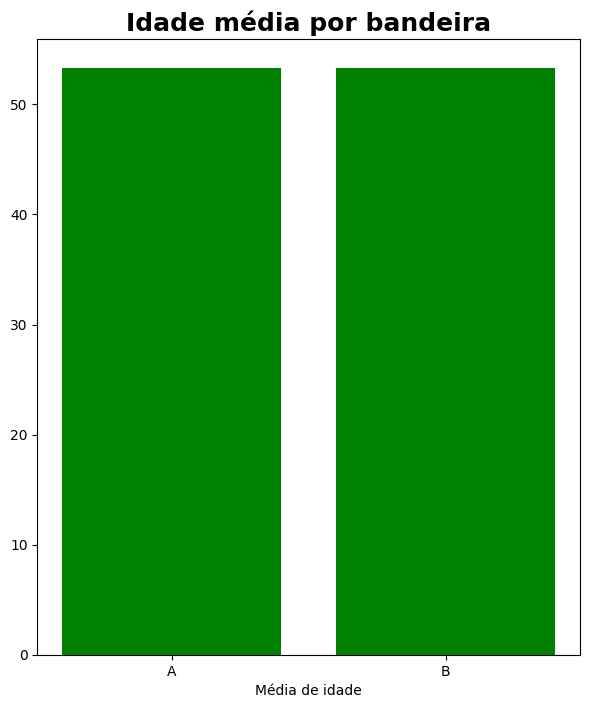

In [ ]:
# Aqui ajustei o tamanho do grafio
fig = plt.figure(figsize = (7,8))
# Aqui foi ajustado a metrica do grafico no caso era bandeira por idade , também ajustei a cor das barras
plt.bar(agg_idade["bandeira"],agg_idade["idade"],color ="green")
# Anexei um titulo na linha x
plt.xlabel("Média de idade")
# Ajustado nome do titulo princial , localização dentro do grafico , tamanho da fonte e cor
plt.title("Idade média por bandeira",loc = "center",fontsize =  18 , fontweight = "bold", color ="black");


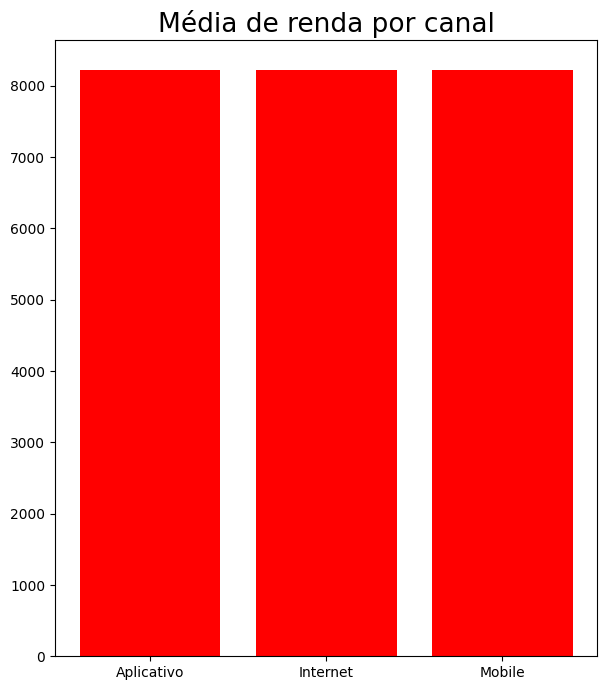

In [ ]:
fig2 = plt.figure(figsize=(7,8))

plt.bar(agg_renda["idcanalvenda"],agg_renda["renda"].agg("mean"),color="red")

plt.title("Média de renda por canal",fontsize = 19);

# **TRABALHANDO COM A PLOTY E ALGUMAS OUTRAS BIBLIOTECAS**

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
px.bar(agg_idade,x="bandeira", y="idade")

In [ ]:
vendas_por_datas=round(vendas_datas.sort_values(ascending=True).reset_index())
vendas_por_datas

,Data,idcompra
0,2023-02-12,152
1,2023-02-22,156
2,2023-02-25,161
3,2023-01-15,162
4,2023-04-14,162
...,...,...
114,2023-02-20,214
115,2023-03-30,214
116,2023-03-07,215
117,2023-01-20,218


In [ ]:
px.bar(agg_dep,x="Nome_Departamento",y="Preço_com_frete")

In [ ]:
agg_dep


,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.0
1,Informatica,2160.0
2,Linha_Industrial,2027.0
3,Cine_e_Foto,1851.0
4,Telefones_e_Celulares,1442.0
5,Eletrodomesticos,1401.0
6,Esporte_e_Lazer,1123.0
7,Tablets,1100.0
8,Games,943.0
9,Instrumentos_Musicais,835.0


# Testando Gráficos no Seaborn

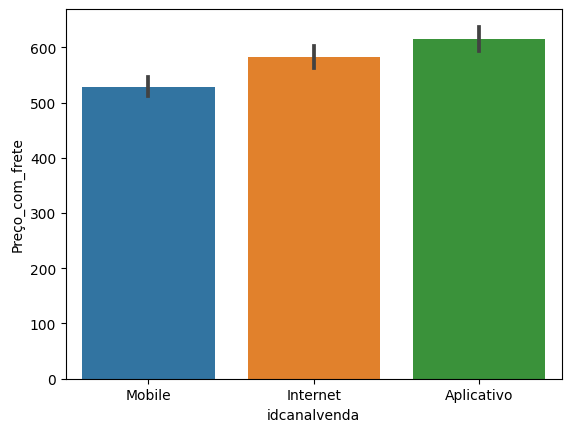

In [ ]:
sns.barplot(data = vendas_correto, x= "idcanalvenda", y= "Preço_com_frete");


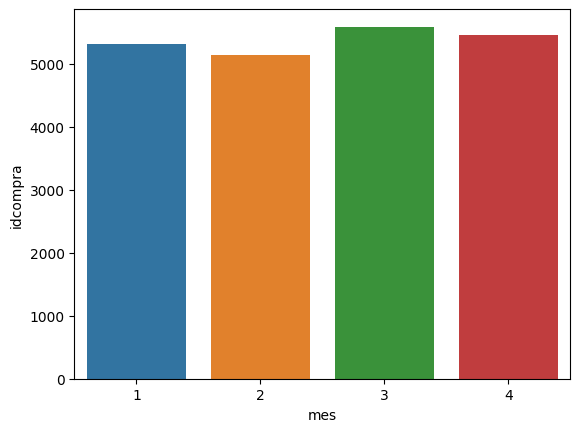

In [ ]:
sns.barplot(data = dx, x = "mes", y = "idcompra");